請查詢內政部(SEGIS)及其他政府公開資料，進行以下分析：

1. 分析台灣各縣市、各鄉鎮市高齡化之分布狀況。

2. 分析台灣各鄉鎮市高齡化較高地區(前十名)與高齡化較低地區(後十名)之所得、醫院數量之差異性。

3. 分析地區高齡化與各生活機能(醫院數量、ATM數量、銀行數量、便利商店數量等)之相關性。

分析後請說明主要研究結果，並提出相關研究建議。

#做鄉鎮市區和縣市分別的資料

鄉鎮市區:人數、醫院、便利商店、所得

縣市:人數、醫院、便利商店、所得、ATM、銀行

#合併資料

In [ ]:
!pip install geopandas

In [ ]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
!mv taipei_sans_tc_beta.ttf /usr/local/lib/python3.6/dist-packages/matplotlib//mpl-data/fonts/ttf

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt 
myfont = FontProperties(fname=r'/content/taipei_sans_tc_beta.ttf')

In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

鄉鎮市區:人數、醫院、便利商店、所得

In [4]:
town_TA = gpd.read_file('/content/drive/MyDrive/其他東西/巨量資料分析/data/G97_TW_U0200_2015.shp')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/其他東西/巨量資料分析/data/醫院、便利商店.csv',encoding = 'unicode_escape')

In [6]:
df=data.drop([0])

In [7]:
town_A_no = town_TA.merge(df, left_on=('CODEBASE'), right_on=('CODEBASE'))

In [8]:
data=town_A_no[["COUNTY","TOWN","COLUMN338","COLUMN320"]] #COLUMN338便利商店數量 COLUMN320醫院數量

In [9]:
data=data.rename(columns={"COLUMN338":"便利商店數量","COLUMN320":"醫院數量"})
data['便利商店數量'] = data['便利商店數量'].fillna('0')

In [10]:
data['便利商店數量'] = data['便利商店數量'].astype(int)
data['醫院數量'] = data['醫院數量'].astype(int)

In [11]:
data=data.groupby("TOWN").sum()

In [12]:
df=pd.read_excel("/content/drive/MyDrive/其他東西/巨量資料分析/data/65歲以上人口數、綜合所得總額.xlsx")

In [13]:
df=df.groupby("鄉鎮市區名稱").sum()

In [14]:
town_A_no = df.merge(data, left_on=(df.index), right_on=(data.index)) 

In [15]:
datacountry=town_A_no.rename(columns={"key_0":"鄉鎮市區名稱"})

In [16]:
datacountry['綜合所得總額'] = datacountry['綜合所得總額'].astype(int)
datacountry['人口數'] = datacountry['人口數'].astype(int)
datacountry['65歲以上人口數'] = datacountry['65歲以上人口數'].astype(int)

In [17]:
datacountry.set_index("鄉鎮市區名稱" , inplace=True)

In [18]:
datacountry['高齡化']=datacountry['65歲以上人口數']/datacountry['人口數']

In [19]:
datacountry['便利商店']=datacountry['便利商店數量']/datacountry['人口數']
datacountry['醫院']=datacountry['醫院數量']/datacountry['人口數']

In [20]:
datacountry.head()

,人口數,65歲以上人口數,綜合所得總額,便利商店數量,醫院數量,高齡化,便利商店,醫院
鄉鎮市區名稱,,,,,,,,
七堵區,53782,7876,12474752,27,39,0.146443,0.000502,0.000725
七美鄉,3825,641,667137,2,1,0.167582,0.000523,0.000261
七股區,22732,4553,2425963,3,4,0.200290,0.000132,0.000176
三地門鄉,7697,844,756495,1,2,0.109653,0.000130,0.000260
三峽區,115820,13249,26128129,54,72,0.114393,0.000466,0.000622


縣市:人數、醫院、便利商店、所得、ATM、銀行

In [ ]:
town_TA = gpd.read_file('/content/drive/MyDrive/其他東西/巨量資料分析/data/G97_TW_U0200_2015.shp')
data=pd.read_csv('/content/drive/MyDrive/其他東西/巨量資料分析/data/醫院、便利商店.csv',encoding = 'unicode_escape')
df=data.drop([0])
town_A_no = town_TA.merge(df, left_on=('CODEBASE'), right_on=('CODEBASE'))
data=town_A_no[["COUNTY","TOWN","COLUMN338","COLUMN320"]] #COLUMN338便利商店數量 COLUMN320醫院數量
data=data.rename(columns={"COLUMN338":"便利商店數量","COLUMN320":"醫院數量"})
data['便利商店數量'] = data['便利商店數量'].fillna('0')
data['便利商店數量'] = data['便利商店數量'].astype(int)
data['醫院數量'] = data['醫院數量'].astype(int)

In [22]:
data=data.groupby("COUNTY").sum()

In [23]:
df=pd.read_excel("/content/drive/MyDrive/其他東西/巨量資料分析/data/65歲以上人口數、綜合所得總額.xlsx")

In [24]:
df=df.groupby("縣市名稱").sum()

In [25]:
town_A_no = df.merge(data, left_on=(df.index), right_on=(data.index)) 

In [26]:
data=town_A_no.rename(columns={"key_0":"縣市名稱"})
data.set_index("縣市名稱" , inplace=True)

In [27]:
df=pd.read_excel("/content/drive/MyDrive/其他東西/巨量資料分析/data/金融機構.xlsx")
df2=pd.read_excel("/content/drive/MyDrive/其他東西/巨量資料分析/data/ATM.xlsx")

In [28]:
town_A_no = data.merge(df, left_on=('縣市名稱'), right_on=('縣市'))
datacity = town_A_no.merge(df2, left_on=('縣市'), right_on=('縣市'))

In [29]:
datacity['ATM數量'] = datacity['ATM數量'].astype(int)
datacity['金融機構數量'] = datacity['金融機構數量'].astype(int)
datacity['綜合所得總額'] = datacity['綜合所得總額'].astype(int)
datacity['人口數'] = datacity['人口數'].astype(int)
datacity['65歲以上人口數'] = datacity['65歲以上人口數'].astype(int)

In [30]:
datacity.set_index("縣市" , inplace=True)

In [31]:
datacity['高齡化']=datacity['65歲以上人口數']/datacity['人口數']

In [32]:
datacity['便利商店']=datacity['便利商店數量']/datacity['人口數']
datacity['醫院']=datacity['醫院數量']/datacity['人口數']
datacity['金融機構']=datacity['金融機構數量']/datacity['人口數']
datacity['ATM']=datacity['ATM數量']/datacity['人口數']

In [33]:
datacity=datacity.sort_values(by=['高齡化'])

In [34]:
datacity

,人口數,65歲以上人口數,綜合所得總額,便利商店數量,醫院數量,金融機構數量,ATM數量,高齡化,便利商店,醫院,金融機構,ATM
縣市,,,,,,,,,,,,
連江縣,13056,1467,4314148,7,5,2,23,0.112362,0.000536,0.000383,0.000153,0.001762
桃園市,2220872,253213,579407537,1247,1598,386,2937,0.114015,0.000561,0.000720,0.000174,0.001322
新竹市,445635,53428,170952117,305,439,137,862,0.119892,0.000684,0.000985,0.000307,0.001934
臺中市,2803894,340852,666407664,1231,3424,573,3376,0.121564,0.000439,0.001221,0.000204,0.001204
新竹縣,557010,68516,187666197,311,400,97,743,0.123007,0.000558,0.000718,0.000174,0.001334
金門縣,139273,17805,38068129,19,52,14,83,0.127842,0.000136,0.000373,0.000101,0.000596
新北市,3995717,539705,1059008988,2072,3322,767,4935,0.135071,0.000519,0.000831,0.000192,0.001235
嘉義市,268622,39737,59449929,101,410,74,361,0.147929,0.000376,0.001526,0.000275,0.001344
高雄市,2773533,416436,630973735,947,3011,576,3061,0.150146,0.000341,0.001086,0.000208,0.001104


#分析台灣各縣市、各鄉鎮市高齡化之分布狀況。

In [35]:
town_TA = gpd.read_file('/content/drive/MyDrive/其他東西/巨量資料分析/data/TOWN_MOI_1081121.shp', encoding='utf-8')

In [36]:
town_A_city = town_TA.merge(datacity, left_on=('COUNTYNAME'), right_on=('縣市'))

Text(0.5, 1.0, '107年台灣各縣市高齡化比例之分布狀況')

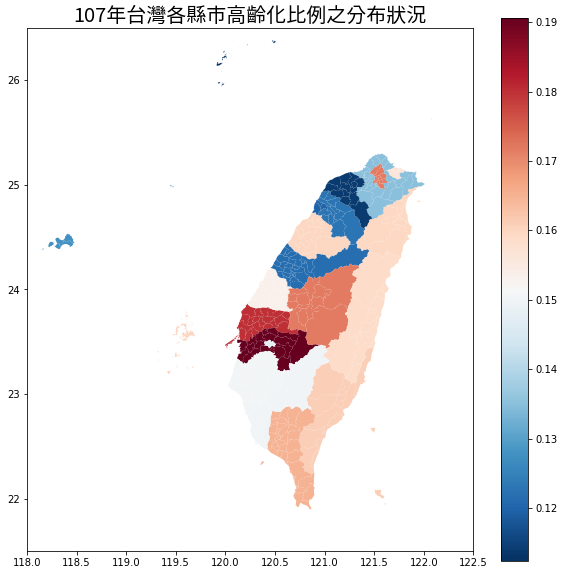

In [37]:
plt.rcParams['figure.figsize']=(10,10)
SA=town_A_city.plot(column='高齡化',cmap='RdBu_r', legend=True)
SA.set_xlim(118, 122.5)
SA.set_ylim(21.5, 26.5)
plt.title("107年台灣各縣市高齡化比例之分布狀況",fontproperties=myfont,fontsize=20)

In [38]:
town_A_country = town_TA.merge(datacountry, left_on=('TOWNNAME'), right_on=('鄉鎮市區名稱'))

Text(0.5, 1.0, '107年台灣各鄉鎮市高齡化比例之分布狀況')

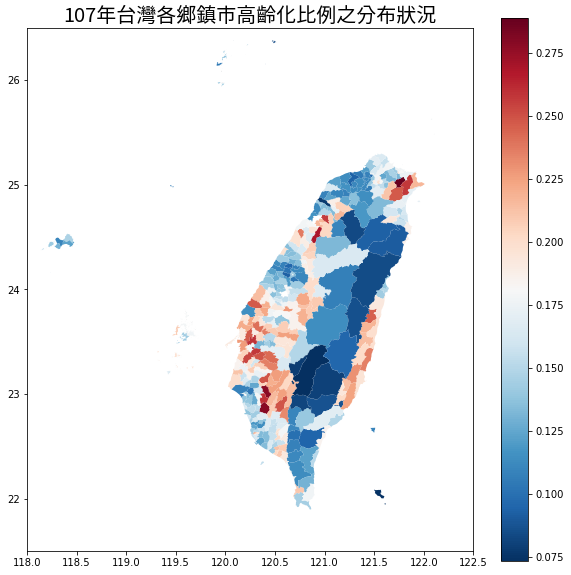

In [39]:
plt.rcParams['figure.figsize']=(10,10)
SA=town_A_country.plot(column='高齡化',cmap='RdBu_r', legend=True)
SA.set_xlim(118, 122.5)
SA.set_ylim(21.5, 26.5)
plt.title("107年台灣各鄉鎮市高齡化比例之分布狀況",fontproperties=myfont,fontsize=20)

#分析台灣各鄉鎮市高齡化較高地區(前十名)與高齡化較低地區(後十名)之所得、醫院數量之差異性。

In [40]:
townshiplow=datacountry.sort_values(by=['高齡化'])[:10]
townshiplow=townshiplow[::-1]
townshiplow

,人口數,65歲以上人口數,綜合所得總額,便利商店數量,醫院數量,高齡化,便利商店,醫院
鄉鎮市區名稱,,,,,,,,
萬榮鄉,6419,554,780328,0,3,0.086306,0.000000,0.000467
秀林鄉,15939,1350,1991093,5,13,0.084698,0.000314,0.000816
尖石鄉,9695,815,803884,1,4,0.084064,0.000103,0.000413
東引鄉,1350,113,471404,1,1,0.083704,0.000741,0.000741
茂林區,1994,163,261449,0,0,0.081745,0.000000,0.000000
海端鄉,4186,338,464687,0,1,0.080745,0.000000,0.000239
那瑪夏區,3148,247,310484,0,2,0.078463,0.000000,0.000635
竹北市,187336,14522,94296697,105,188,0.077518,0.000560,0.001004
蘭嶼鄉,5157,383,585012,2,1,0.074268,0.000388,0.000194


In [41]:
townshiphigh=datacountry.sort_values(by=['高齡化'],ascending=False)[:10]
townshiphigh

,人口數,65歲以上人口數,綜合所得總額,便利商店數量,醫院數量,高齡化,便利商店,醫院
鄉鎮市區名稱,,,,,,,,
平溪區,4666,1349,609981,3,3,0.289113,0.000643,0.000643
田寮區,7159,1999,832720,0,2,0.279229,0.000000,0.000279
左鎮區,4781,1331,440569,0,3,0.278394,0.000000,0.000627
獅潭鄉,4331,1166,568795,1,2,0.269222,0.000231,0.000462
龍崎區,3995,1038,457978,2,1,0.259825,0.000501,0.000250
六腳鄉,22960,5951,2847758,4,3,0.259190,0.000174,0.000131
雙溪區,8860,2285,1457474,2,4,0.257901,0.000226,0.000451
鹿草鄉,15358,3957,2017134,2,4,0.257651,0.000130,0.000260
峨眉鄉,5587,1436,999042,0,2,0.257025,0.000000,0.000358


In [42]:
township=pd.concat([townshiphigh, townshiplow], axis=0)
township=township[["綜合所得總額","醫院"]]
township

,綜合所得總額,醫院
鄉鎮市區名稱,,
平溪區,609981,0.000643
田寮區,832720,0.000279
左鎮區,440569,0.000627
獅潭鄉,568795,0.000462
龍崎區,457978,0.000250
六腳鄉,2847758,0.000131
雙溪區,1457474,0.000451
鹿草鄉,2017134,0.000260
峨眉鄉,999042,0.000358


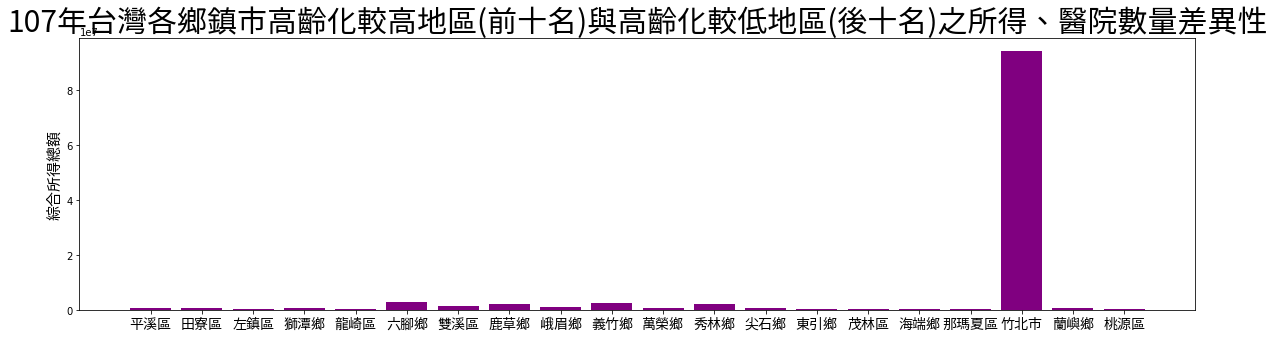

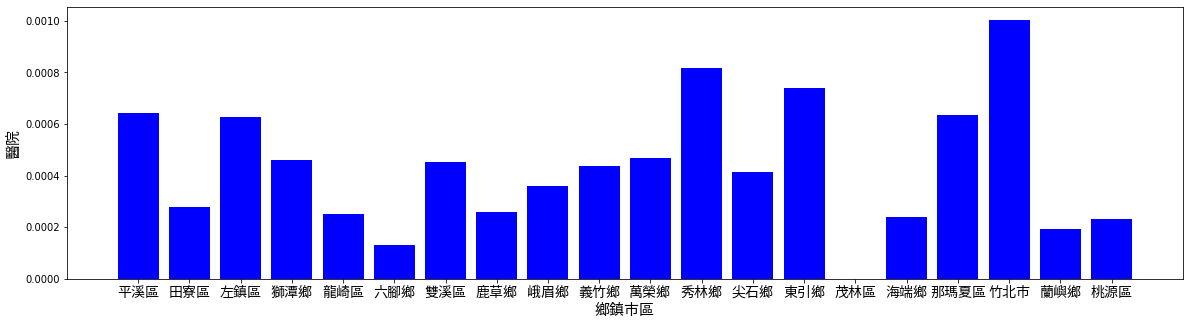

In [43]:
plt.rcParams['figure.figsize']=(20,5)
districts = township.index
amounts = township['綜合所得總額']
x = np.arange(len(districts))
plt.bar(x, amounts, color=['#800080'])
plt.xticks(x, districts, fontproperties=myfont, fontsize=14)
plt.ylabel('綜合所得總額', fontproperties=myfont, fontsize=15)
plt.title('107年台灣各鄉鎮市高齡化較高地區(前十名)與高齡化較低地區(後十名)之所得、醫院數量差異性', fontproperties=myfont, fontsize=30)
plt.show()
plt.rcParams['figure.figsize']=(20,5)
districts = township.index
amounts = township['醫院']
x = np.arange(len(districts))
plt.bar(x, amounts, color=['#0000FF'])
plt.xticks(x, districts, fontproperties=myfont, fontsize=14)
plt.xlabel('鄉鎮市區', fontproperties=myfont, fontsize=15)
plt.ylabel('醫院', fontproperties=myfont, fontsize=15)
plt.show()

#分析地區高齡化與各生活機能(醫院數量、ATM數量、金融機構數量、零售商家數量等)之相關性。

In [44]:
#1量對多量的相關分析

city_set=['便利商店','醫院','ATM','金融機構','高齡化']
city_corr=datacity[city_set].corr()
corr_result=pd.DataFrame(city_corr['高齡化'])

from scipy import stats
name=[]
alist=[]
pvlist=[]
meanlist=[]
for i in range(len(city_set)):
  (r,pvalue)=stats.pearsonr(datacity['高齡化'],datacity[city_set[i]]) 
  name.append(city_set[i])
  alist.append(r)
  pvlist.append(pvalue)
pd.set_option('display.float_format',lambda x:'%.4f'%x)
result=pd.DataFrame(alist,name,columns=['Correlation'])
result.insert(1,'p-value',pvlist)
result.insert(2,'平均數',datacity.describe().T['mean']) 
result=result.sort_values(by=['p-value'])[::-1]
result

,Correlation,p-value,平均數
醫院,0.0879,0.6974,0.0009
金融機構,0.3315,0.1318,0.0002
ATM,-0.3709,0.0892,0.0012
便利商店,-0.4521,0.0347,0.0004
高齡化,1.0000,0.0000,0.1496


In [50]:
datacity=datacity.rename(columns={"便利商店":"convenience store","醫院":"hospital","金融機構":"bank","高齡化":"aging"})

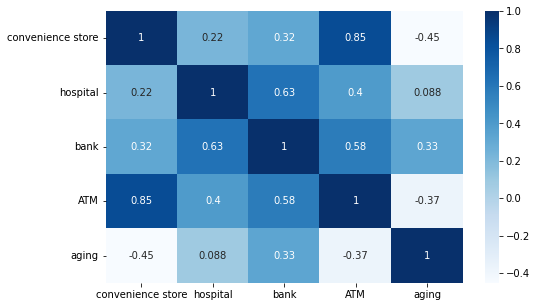

In [52]:
plt.rcParams['figure.figsize']=(8,5)
pairlist=['convenience store','hospital','bank','ATM','aging']
sns.heatmap(datacity[pairlist].corr(),annot=True,cmap='Blues')